### Includes and keys

In [1]:
import sys
import os
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', 400)

import canalyst_candas.candas as cd
import canalyst_candas.candas_datareader as cdr
from canalyst_candas.configuration.config import Config

config_info = {
    "canalyst_api_key":"",
  "s3_access_key_id": "",
    "s3_secret_key": "",
    "fred_key": "",
  "default_dir": "",
  "mds_host": "",
  "wp_host": ""
}

config = Config(config=config_info)

A configuration file has been created for you in 
/Users/jedgore/canalyst/keys.json.


### Ticker list

In [2]:
consumer_names = ['TSN US',
                  'SYY US',
                  'COST US']

### Create a ModelSet of these tickers, send in config object to handle authorization

In [3]:
consumer_modelset = cd.ModelSet(ticker_list = consumer_names, config=config)

### By default ModelSet will return all time series ... if we want time series common to all tickers in the modelset use common_time_series_names

In [4]:
common_names = consumer_modelset.common_time_series_names()
common_names

['MO_CFS_NI',
 'MO_CFSum_Acquisition',
 'MO_VA_P_ToCF',
 'MO_RIS_SGA',
 'MO_RIS_EBITDA',
 'MO_RIS_EBT',
 'MO_RIS_DA',
 'MO_DAF_Intangibles_EoP',
 'MO_VA_StockPrice_High',
 'MO_OS_EBIT',
 'MO_RIS_Tax_Deferred',
 'MO_CFS_Balance_End',
 'MO_BS_INV',
 'MO_RIS_OI',
 'MO_BS_CL',
 'MO_DAF_PPE_BoP',
 'MO_RIS_EPS_WAD_Adj',
 'MO_VA_FX_Average',
 'MO_DAF_PPE_EoP',
 'MO_DAF_Capex',
 'MO_CFSum_Capex',
 'MO_DAF_Intangibles_Other',
 'MO_IS_FirstRow',
 'MO_BS_OCI',
 'MO_RIS_ShareCount_WAD',
 'MO_CCFS_Sup_CashTax',
 'MO_RIS_REV',
 'MO_CFSum_NetShares',
 'MO_MA_SGA',
 'MO_BSS_InterestRate_Debt',
 'MO_BSS_Debt_LT',
 'MO_DAF_A',
 'MO_BSS_Debt',
 'MO_VA_EVCalc_Prefs',
 'MO_DAF_Intangibles_Life',
 'MO_CFSum_DPS',
 'MO_BSS_Cash',
 'MO_BS_CA',
 'MO_CFS_Sup_CashInterest',
 'MO_CCFS_CFI',
 'MO_BSS_II',
 'MO_CFS_NetChange',
 'MO_CCFS_FX',
 'MO_RIS_ShareCount_WAD_Adj',
 'MO_BS_NCA',
 'MO_VA_FCFYield_ToMktCap',
 'MO_CFS_CFO_BeforeWC',
 'MO_VA_EVCalc_Other',
 'MO_BS_TLSE',
 'MO_BS_RetainedEarnings',
 'MO_CFSum_FCF_

In [5]:
consumer_modelset.model_frame(period_duration_type='fiscal_quarter').head()

,ticker,period_name,period_duration_type,period_start_date,period_end_date,category,category_type_slug,time_series_slug,time_series_name,category_type_name,...,unit_description,unit_symbol,unit_type,value,is_historical,MRFQ,period_name_sorted,CSIN,is_driver,name_index
55198,SYY US,Q1-2013,fiscal_quarter,2012-07-01,2012-09-29,Growth Analysis,other-category-type,us-case-volume-impact,z_GF8XGX0169_MO_GA_UScasevolumeimpact,Other,...,Percentage,%,percentage,NaN,True,Q2-2022,2013Q1,GF8XGX0169,True,7.00
59166,SYY US,Q1-2013,fiscal_quarter,2012-07-01,2012-09-29,Growth Analysis,other-category-type,us-inflation-impact,z_GF8XGX0169_MO_GA_USinflationimpact,Other,...,Percentage,%,percentage,NaN,True,Q2-2022,2013Q1,GF8XGX0169,True,8.00
43046,SYY US,Q1-2013,fiscal_quarter,2012-07-01,2012-09-29,Growth Analysis,other-category-type,us-acquisition-impact,z_GF8XGX0169_MO_GA_USacquisitionimpact,Other,...,Percentage,%,percentage,NaN,True,Q2-2022,2013Q1,GF8XGX0169,True,9.00
40318,SYY US,Q1-2013,fiscal_quarter,2012-07-01,2012-09-29,Growth Analysis,other-category-type,us-extra-week-impact,z_GF8XGX0169_MO_GA_USextraweekimpact,Other,...,Percentage,%,percentage,NaN,True,Q2-2022,2013Q1,GF8XGX0169,True,10.00
47572,SYY US,Q1-2013,fiscal_quarter,2012-07-01,2012-09-29,Growth Analysis,other-category-type,us-other-impact,z_GF8XGX0169_MO_GA_USotherimpact,Other,...,Percentage,%,percentage,NaN,True,Q2-2022,2013Q1,GF8XGX0169,True,11.00


### Create a model_frame (Pandas dataframe) to get time series descriptions as well

In [6]:
consumer_modelset.model_frame(time_series_name=common_names,
                        is_driver=True,
                            mrq=True,)[['time_series_name','time_series_description']].groupby('time_series_name').first().reset_index()

,time_series_name,time_series_description
0,MO_BSS_InterestRate_Cash,Effective Interest Rate on Cash
1,MO_BSS_InterestRate_Debt,Effective Interest Rate on Debt
2,MO_CFSum_Acquisition,Acquisitions
3,MO_CFSum_Capex,Capex
4,MO_CFSum_DPS,Dividend Per Share
5,MO_CFSum_Divestiture,Divestiture
6,MO_CFSum_NetDebtIssuance,Net Debt Issuance (Repayment)
7,MO_CFSum_NetShares,Net Share Issuance (Buybacks)
8,MO_CFSum_NetShares_Price,"Estimated Share Price for Issuance/Buybacks, USD"
9,MO_DAF_A_Percentage,"Amortization as percentage of Intangibles BoP, %"


### Let's look at just Revenue

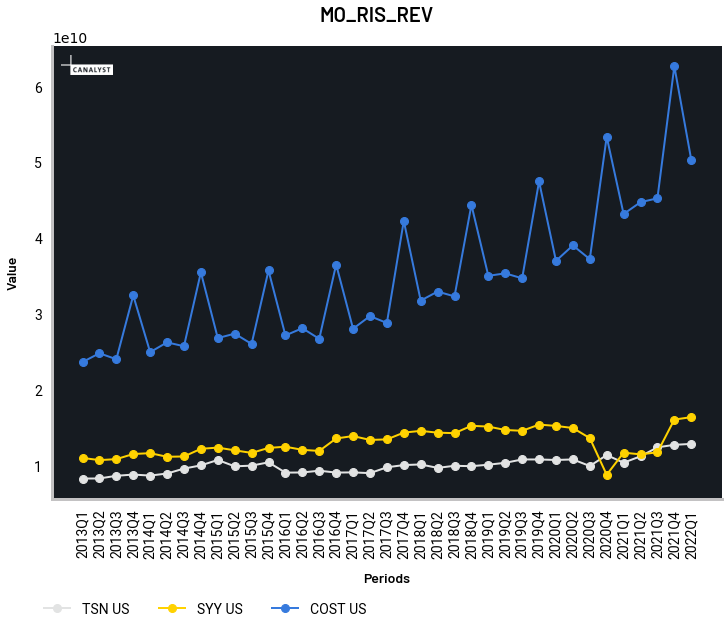

In [7]:
consumer_modelset.plot_time_series(time_series_name = 'MO_RIS_REV')

### Guidance example for one stock

In [8]:
df = consumer_modelset.guidance(tickers=['TSN US'])
df = df[df['Type']=='Historical']
df = df[df['time_series_name']=='MO_RIS_Rev']
df.head(10)


,ticker,Type,time_series_description,time_series_name,Fiscal Period,Low,High,Mid,Type.1,Output,Absolute,Relative,Date,Link
27,TSN US,Historical,Net Revenue,MO_RIS_Rev,FY2021,46000.00,47000.00,46500.00,Actual,47049.00,549.00,0.01,2021-08-09 00:00:00,Press Release
36,TSN US,Historical,Net Revenue,MO_RIS_Rev,FY2021,44000.00,46000.00,45000.00,Actual,47049.00,2049.00,0.05,2021-05-10 00:00:00,Press Release
45,TSN US,Historical,Net Revenue,MO_RIS_Rev,FY2021,42000.00,44000.00,43000.00,Actual,47049.00,4049.00,0.09,2021-02-11 00:00:00,Press Release
54,TSN US,Historical,Net Revenue,MO_RIS_Rev,FY2021,42000.00,44000.00,43000.00,Actual,47049.00,4049.00,0.09,2020-11-16 00:00:00,Press Release
98,TSN US,Historical,Net Revenue,MO_RIS_Rev,FY2020,45000.00,46000.00,45500.00,Actual,43185.00,-2315.00,-0.05,2019-08-05 00:00:00,Press Release
106,TSN US,Historical,Net Revenue,MO_RIS_Rev,FY2019,43000.00,43000.00,43000.00,Actual,42405.00,-595.00,-0.01,2019-08-05 00:00:00,Press Release
119,TSN US,Historical,Net Revenue,MO_RIS_Rev,FY2019,43000.00,43000.00,43000.00,Actual,42405.00,-595.00,-0.01,2019-05-06 00:00:00,Press Release
130,TSN US,Historical,Net Revenue,MO_RIS_Rev,FY2019,43000.00,43000.00,43000.00,Actual,42405.00,-595.00,-0.01,2019-02-07 00:00:00,Press Release
141,TSN US,Historical,Net Revenue,MO_RIS_Rev,FY2019,41000.00,41000.00,41000.00,Actual,42405.00,1405.00,0.03,2018-11-13 00:00:00,Press Release
153,TSN US,Historical,Net Revenue,MO_RIS_Rev,FY2019,42000.00,42000.00,42000.00,Actual,42405.00,405.00,0.01,2018-08-06 00:00:00,Press Release


### As you can see we also have the guidance history for each fiscal year, so let's just take the FIRST instance of that year's guidance

In [9]:
df_guidance = df.groupby(['time_series_name','Fiscal Period']).last().reset_index()
df_guidance

,time_series_name,Fiscal Period,ticker,Type,time_series_description,Low,High,Mid,Type.1,Output,Absolute,Relative,Date,Link
0,MO_RIS_Rev,FY2018,TSN US,Historical,Net Revenue,41000.00,41000.00,41000.00,Actual,40052.00,-948.00,-0.02,2017-11-13 00:00:00,Press Release
1,MO_RIS_Rev,FY2019,TSN US,Historical,Net Revenue,42000.00,42000.00,42000.00,Actual,42405.00,405.00,0.01,2018-08-06 00:00:00,Press Release
2,MO_RIS_Rev,FY2020,TSN US,Historical,Net Revenue,45000.00,46000.00,45500.00,Actual,43185.00,-2315.00,-0.05,2019-08-05 00:00:00,Press Release
3,MO_RIS_Rev,FY2021,TSN US,Historical,Net Revenue,42000.00,44000.00,43000.00,Actual,47049.00,4049.00,0.09,2020-11-16 00:00:00,Press Release


### Create a model_frame of just revenue, fiscal year, and only historical

In [10]:
df = consumer_modelset.model_frame(ticker='TSN US',
                                   time_series_name='MO_RIS_REV',
                        period_duration_type='fiscal_year',
                        is_historical=True,
                            )

### We are still in the middle of the "guidance project" on the models, cleaning up all the guidance tabs to be the same, so sometimes you need to adjust for units ... 

In [11]:
df_plot = pd.merge(df,df_guidance,how='inner',left_on=['ticker','period_name'],right_on=['ticker','Fiscal Period'])[['ticker','period_name','value','Mid']]
df_plot['value']=df_plot['value']/1000000
df_plot

,ticker,period_name,value,Mid
0,TSN US,FY2018,40052.00,41000.00
1,TSN US,FY2019,42405.00,42000.00
2,TSN US,FY2020,43185.00,45500.00
3,TSN US,FY2021,47049.00,43000.00


### Make a chart of actual vs initial guidance by year

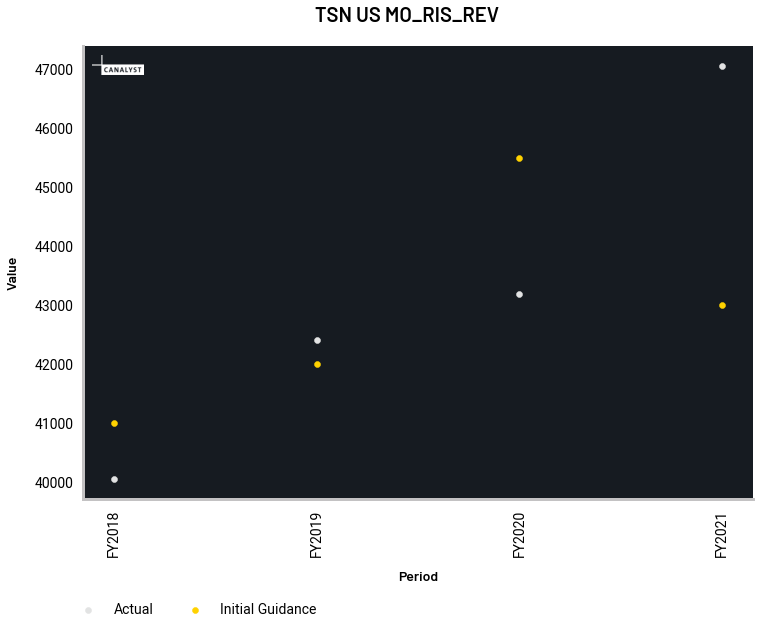

In [12]:
cd.Chart(
            x_value=df_plot["period_name"],
            y_values=df_plot[['value','Mid']],
            labels=['Actual','Initial Guidance'],
            title='TSN US MO_RIS_REV',
            axis_labels=[['Period','Value']],
            plot_styles=['scatter']
        )